# Mise en forme des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.decomposition import PCA # for PCA analysis
import seaborn as sns
'''
df = pd.DataFrame(pd.read_csv("./data_csv/AilanteBilan.csv"))
df1 = pd.DataFrame(pd.read_csv("./data_csv/CanneBilan.csv"))
df2 = pd.DataFrame(pd.read_csv("./data_csv/MimosaBilan.csv"))

# Supprimer les données vides
df = df.drop(['Nombre rameaux', 'Réplicat'], axis = 1)
df = df.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df1 = df1.drop(['Nombre rameaux', 'Réplicat '], axis = 1)
df1 = df1.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df2 = df2.drop(['Nombre rameaux','Nombre nœuds', 'Réplicat'], axis = 1)
df2 = df2.dropna(subset=['Hauteur', 'Nb feuilles','Nombre'])

df = pd.concat([df,df1])
df = pd.concat([df,df2])


NA1 = []
NA2 = []
sol = []
temoin = []
invasive = []
SII =[]

for row in df['Traitement'] :
    if row == 'NA1' or row == 'NA1+sol':
        NA1.append(1)
    else :
        NA1.append(0)
    
    if row == 'NA2' or row == 'NA2+sol':
        NA2.append(1)
    else :
        NA2.append(0)
        
    if row == 'NA1+sol' or row == 'Sol' or row == 'NA2+sol' or row == 'sol':
        sol.append(1)
    else :
        sol.append(0)

    if row == 'Témoin' :
        temoin.append(1)
    else :
        temoin.append(0)
        
    if row == 'Invasives' :
        invasive.append(1)
    else :
        invasive.append(0)
     
    if row == 'Sol invasives (inversion)' :
        SII.append(1)
    else :
        SII.append(0)
        
tmp = df['Hauteur']
hauteur = []
for row in tmp :
    hauteur.append(row)

tmp = df['Date']
date = []
for row in tmp :
    date.append(row)
    
tmp = df['Nb feuilles']
nbf = []
for row in tmp :
    nbf.append(row)

tmp = df['Nombre']
nb = []
for row in tmp :
    nb.append(row)
tmp = df['Station']
station  = []
for row in tmp :
    station.append(row)

dataf = pd.DataFrame({'Station' :  pd.Series(station) ,'NA1' : pd.Series(NA1), 'NA2' : pd.Series(NA2), 'Sol' : pd.Series(sol),'témoin' : pd.Series(temoin),'invasive' : pd.Series(invasive),'SII' : pd.Series(SII), 'hauteur' : pd.Series(hauteur), 'nombre feuilles' : pd.Series(nbf), 'date' : pd.Series(date), 'nombre' : pd.Series(nb)})


dataf.to_csv('./data_csv/shaped_data.csv',header=True,index=False)
'''



'\ndf = pd.DataFrame(pd.read_csv("./data_csv/AilanteBilan.csv"))\ndf1 = pd.DataFrame(pd.read_csv("./data_csv/CanneBilan.csv"))\ndf2 = pd.DataFrame(pd.read_csv("./data_csv/MimosaBilan.csv"))\n\n# Supprimer les données vides\ndf = df.drop([\'Nombre rameaux\', \'Réplicat\'], axis = 1)\ndf = df.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf1 = df1.drop([\'Nombre rameaux\', \'Réplicat \'], axis = 1)\ndf1 = df1.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf2 = df2.drop([\'Nombre rameaux\',\'Nombre nœuds\', \'Réplicat\'], axis = 1)\ndf2 = df2.dropna(subset=[\'Hauteur\', \'Nb feuilles\',\'Nombre\'])\n\ndf = pd.concat([df,df1])\ndf = pd.concat([df,df2])\n\n\nNA1 = []\nNA2 = []\nsol = []\ntemoin = []\ninvasive = []\nSII =[]\n\nfor row in df[\'Traitement\'] :\n    if row == \'NA1\' or row == \'NA1+sol\':\n        NA1.append(1)\n    else :\n        NA1.append(0)\n    \n    if row == \'NA2\' or row == \'NA2+sol\':\n        NA2.append(1)\n    else :\n        NA2.appen

Nous nous intéresserons à l'évolution des plantes au cours du temps.
Cependant, ne pouvant pas faire matcher les lignes unes à unes grâce aux dates car il n'y pas pas le même nombre de mesure à chaque date. Nous allons donc nous servir du fichier __Resume.csv__ afin de pouvoir calculer la variation sur l'évolution des plantes.


Pour des raison de simplification du code , les dates 03.11.2021 et 24.05.2022 ont été remplacées respectivement par 04.11.2021 et 23.05.2022

In [2]:

# lecture du fichier contenant le resumé des mesures des EEE sur 3 périodes

df = pd.read_csv("data_csv/Resume.csv")
#df = df.dropna(subset = ['Nombre','Moyenne Hauteur','Moyenne Nf'])

#Remplacer les NaN par 0 et conversion des valeurs des colonnes 
df.fillna(0,inplace = True)
df['Moyenne Hauteur'] = df['Moyenne Hauteur'].astype(float)
df['Moyenne Nf'] = df['Moyenne Nf'].astype(float)
df['Nombre'] = df['Nombre'].astype(float)

# calcul de la variation des métriques entre les différentes dates par station et par traitement
station = ['1M','1C','3A']
traitement= ['NA1','NA2', 'NA1+Sol', 'NA2+Sol', 'Sol' ,'Invasives','Témoin']

dff  = pd.DataFrame(columns=['Station', 'Traitement', 'Compost', 'Réplicat','Nombre','Moyenne Hauteur', 'Moyenne Nf' , 'Date initiale', 'Date finale'])
for s in station :
    for t in traitement :
        df_t1 = df.loc[(df['Date'] == '06.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df_t = df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df21 = pd.concat([df_t[['Station','Traitement', 'Compost', 'Réplicat']],df_t.iloc[ : ,[5,6,7]] - df_t1.iloc[: , [5,6,7]],df_t1['Date']],axis = 1)
        df21 = df21.rename(columns ={'Date' : 'Date initiale'})

        df21 = pd.concat([df21,df_t['Date']],axis = 1)
        df21 = df21.rename(columns ={'Date' : 'Date finale'})

        df_t1 = df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df_t = df.loc[(df['Date'] == '23.05.2022') & (df['Station'] == s) & (df['Traitement'] == t)].reset_index(drop = True)

        df2122 = pd.concat([df_t[['Station','Traitement', 'Compost', 'Réplicat']], df_t.iloc[ : ,[5,6,7]] - df_t1.iloc[: , [5,6,7]],df_t1['Date']],axis = 1)
        df2122 = df2122.rename(columns ={'Date' : 'Date initiale'})

        df2122 = pd.concat([df2122,df_t['Date']],axis = 1)
        df2122 = df2122.rename(columns ={'Date' : 'Date finale'})

        dff = pd.concat([dff, df21, df2122], ignore_index = True)

#print(df.loc[(df['Date'] == '04.11.2021') & (df['Station'] == '3A') & (df['Traitement'] == 'Témoin')])
#print(df21)
#print(dff)

# Conversion des entrées(Traitement, Compost) en données binaires

NA1 = []
NA2 = []
sol = []
temoin = []
invasive = []
SII =[]

#print(df)

for row in dff['Traitement'] :
    if row == 'NA1' or row == 'NA1+Sol':
        NA1.append(1)
    else :
        NA1.append(0)
    
    if row == 'NA2' or row == 'NA2+Sol':
        NA2.append(1)
    else :
        NA2.append(0)
        
    if row == 'NA1+sol' or row == 'Sol' or row == 'NA2+Sol' or row == 'sol':
        sol.append(1)
    else :
        sol.append(0)

    if row == 'Témoin' :
        temoin.append(1)
    else :
        temoin.append(0)
        
    if row == 'Invasives' :
        invasive.append(1)
    else :
        invasive.append(0)
compost = []
for row in dff['Compost'] :
    if row == 'Avec' :
        compost.append(1)
    else :
        compost.append(0)
    


resume_shaped = pd.DataFrame({'NA1' : pd.Series(NA1), 'NA2' : pd.Series(NA2), 'Sol' : pd.Series(sol),'Témoin' : pd.Series(temoin),'Invasive' : pd.Series(invasive),'Compost' : pd.Series(compost)})

resume_shaped = pd.concat([dff[['Station','Date initiale', 'Date finale','Réplicat']],resume_shaped,dff[['Nombre', 'Moyenne Hauteur', 'Moyenne Nf']]], axis = 1 )
resume_shaped =  resume_shaped.rename(columns ={'Nombre':'var. Nombre' , 'Moyenne Hauteur':'var. Hauteur' , 'Moyenne Nf' : 'var. Nf'})
resume_shaped.to_csv('./data_csv/resume_shaped_for_tree.csv')
print(resume_shaped)


    Station Date initiale Date finale Réplicat  NA1  NA2  Sol  Témoin  \
0        1M       06.2021  04.11.2021        A    1    0    0       0   
1        1M       06.2021  04.11.2021        B    1    0    0       0   
2        1M       06.2021  04.11.2021        C    1    0    0       0   
3        1M    04.11.2021  23.05.2022        A    1    0    0       0   
4        1M    04.11.2021  23.05.2022        B    1    0    0       0   
5        1M    04.11.2021  23.05.2022        C    1    0    0       0   
6        1M       06.2021  04.11.2021        A    0    1    0       0   
7        1M       06.2021  04.11.2021        B    0    1    0       0   
8        1M       06.2021  04.11.2021        C    0    1    0       0   
9        1M    04.11.2021  23.05.2022        A    0    1    0       0   
10       1M    04.11.2021  23.05.2022        B    0    1    0       0   
11       1M    04.11.2021  23.05.2022        C    0    1    0       0   
12       1M       06.2021  04.11.2021        A    1

#### PCA

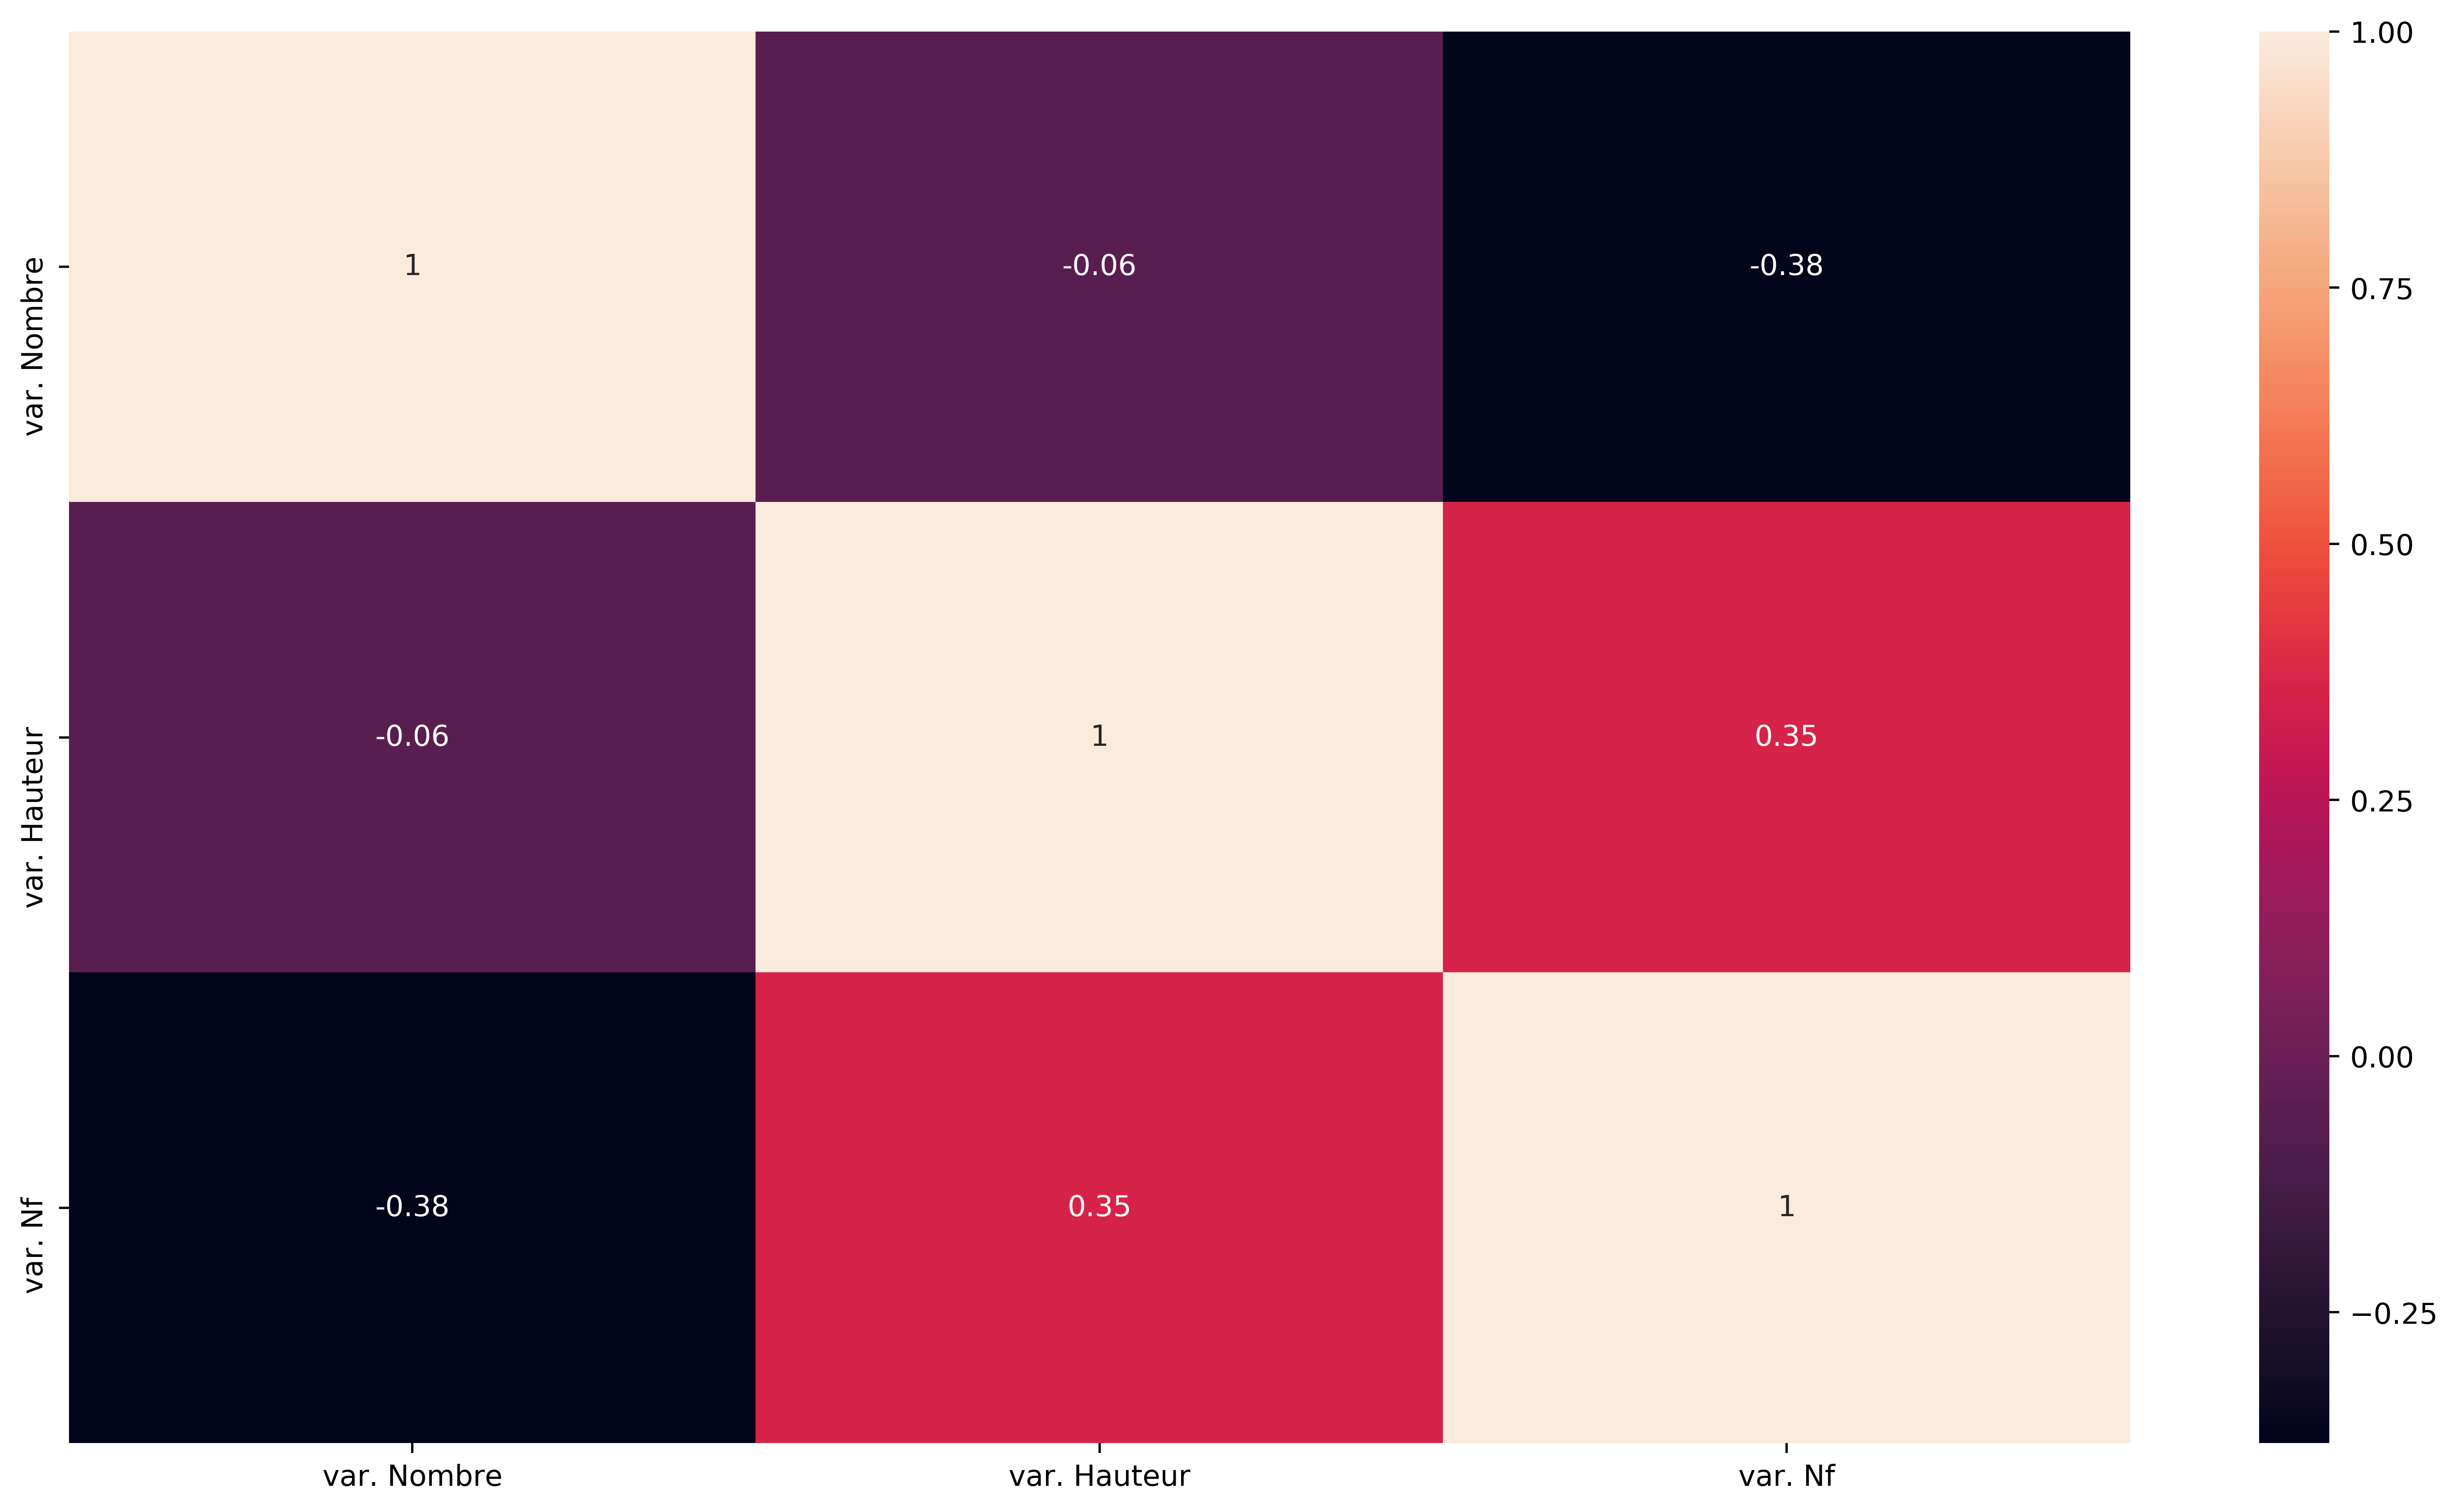

In [3]:
# Create a correlation matrix
corrMatrix = resume_shaped[['var. Nombre','var. Hauteur','var. Nf']].corr()

# Plot the correlation matrix
plt.figure(figsize=(16,9), dpi=500)
sns.heatmap(corrMatrix, annot=True) 
plt.show()

In [4]:
X=resume_shaped[['var. Nombre','var. Hauteur','var. Nf']]

scaler = StandardScaler()
# Normalisation 
X_std = scaler.fit_transform(X)

In [5]:
# Select the model and its parameters
pca = PCA(n_components=3)

# Fit the model
X_trans=pca.fit_transform(X_std)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  3
No. of samples:  126
No. of components:  3
Explained variance ratio:  [0.51633699 0.31346136 0.17020164]


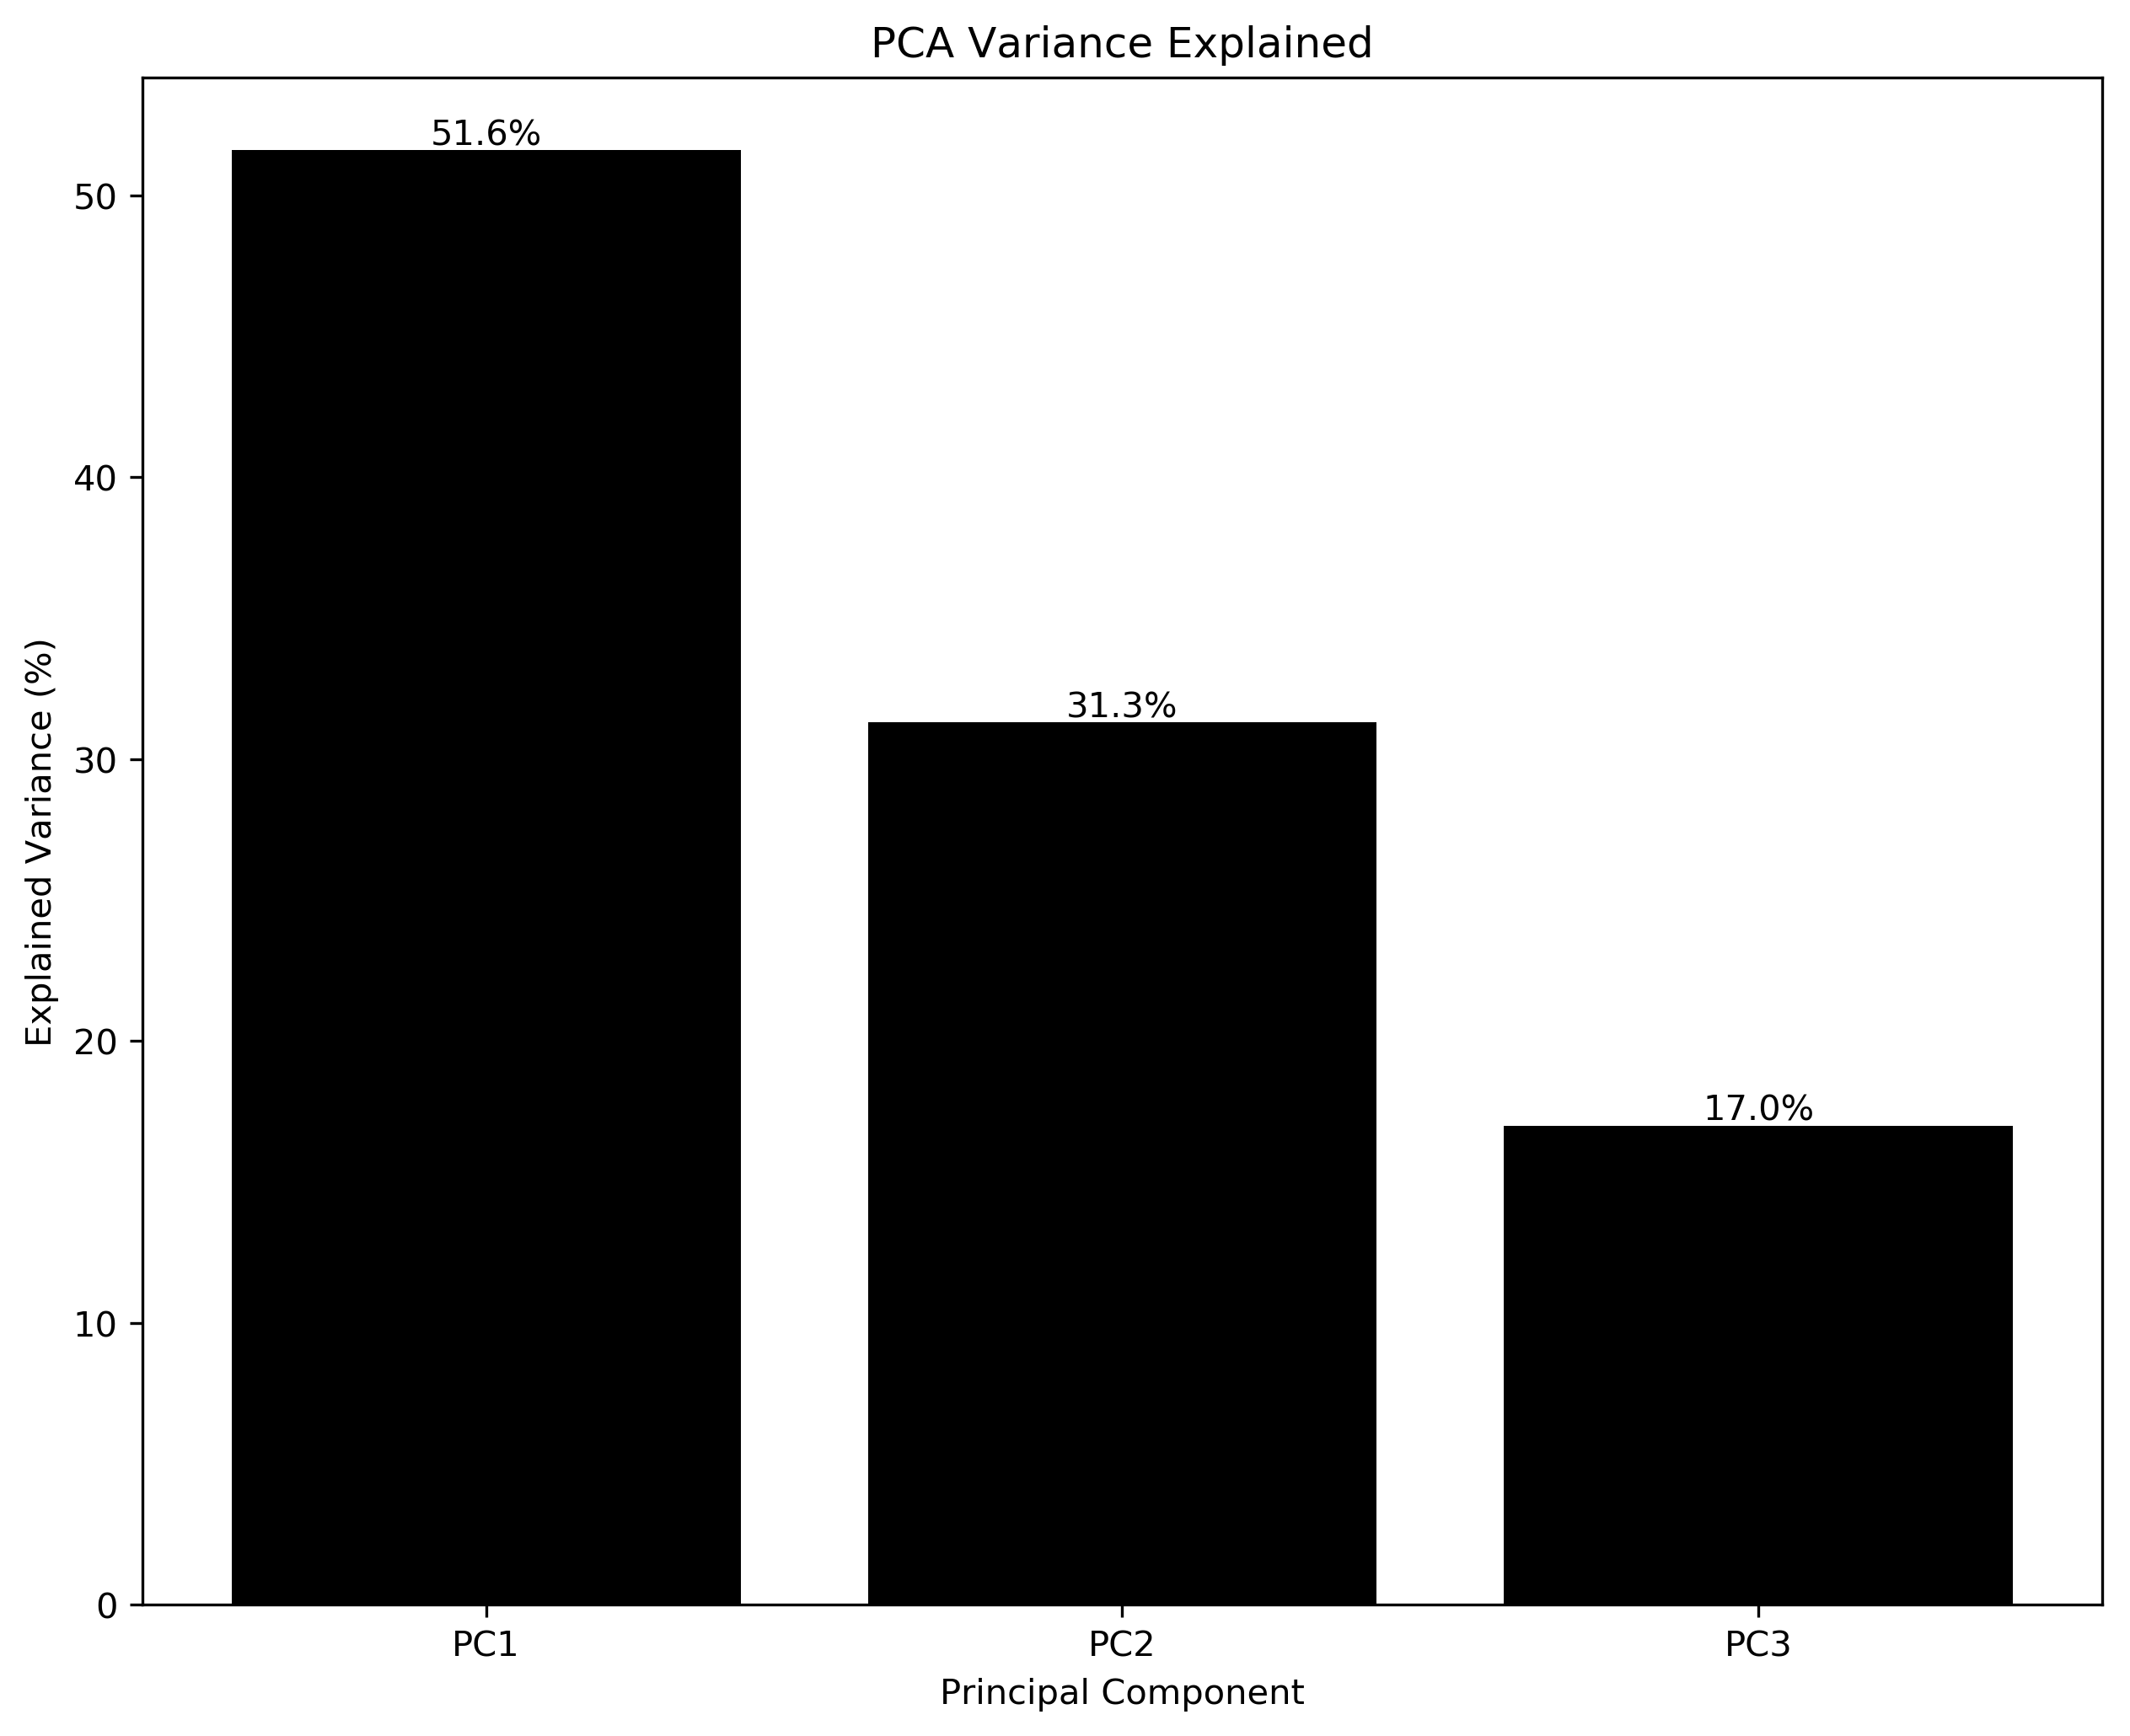

In [6]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title('PCA Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

(126, 2)


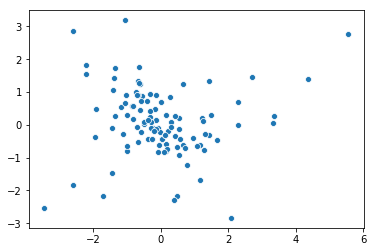

In [7]:
# Nuage de points de PC2 en fonction de PC1
X_acp =np.array([ligne[:2] for ligne in X_trans])
print(X_acp.shape)
#print()
#print(X_acp)
sns.scatterplot(x = X_acp[:,0],y = X_acp[:,1])


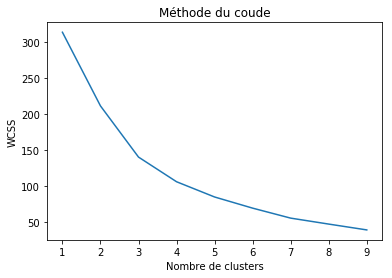

In [8]:
#Méthode du coude pour identifier la valeur optimale de K
# Initialiser la liste des valeurs de WCSS pour différentes valeurs de K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []

# Calculer WCSS pour différentes valeurs de K
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_acp)
    wcss.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 10), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

Score silhouette : 0.42396224086601436
[[ 0.10722418 -0.53048171]
 [-0.89287525  0.90699638]
 [ 3.16891562  0.99658434]]
['purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'orange', 'orange']


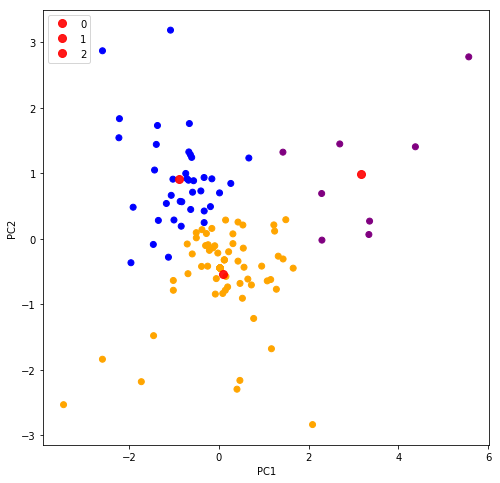

In [9]:
#Clusterisation

clusterer = KMeans(n_clusters=3,random_state=42).fit(X_acp)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(X_acp)

# Calculer le score silhouette
score = silhouette_score(X_acp, c_preds)
print("Score silhouette :", score)
print(centers)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue', 'purple']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter( X_acp[:,0], X_acp[:,1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [10]:
#correspondance des enregistrements avec nos cluster
clust_prod = resume_shaped.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

Station Date initiale Date finale Réplicat  NA1  NA2  Sol  Témoin  Invasive  \
0      1M       06.2021  04.11.2021        A    1    0    0       0         0   
1      1M       06.2021  04.11.2021        B    1    0    0       0         0   
2      1M       06.2021  04.11.2021        C    1    0    0       0         0   
3      1M    04.11.2021  23.05.2022        A    1    0    0       0         0   
4      1M    04.11.2021  23.05.2022        B    1    0    0       0         0   
5      1M    04.11.2021  23.05.2022        C    1    0    0       0         0   
6      1M       06.2021  04.11.2021        A    0    1    0       0         0   
7      1M       06.2021  04.11.2021        B    0    1    0       0         0   
8      1M       06.2021  04.11.2021        C    0    1    0       0         0   
9      1M    04.11.2021  23.05.2022        A    0    1    0       0         0   

   Compost  var. Nombre  var. Hauteur     var. Nf  cluster  
0        0         12.0     35.500000  -34.375000        2  
1        0          3.0     36.222222  -32.305556        0  
2        0          2.0     62.333333  -20.571429        0  
3        0        -11.0     43.455128   15.253205        0  
4        0          1.0     30.256410   15.673077        0  
5        0         -5.0     36.916667   28.500000        0  
6        0          2.0     29.566667 -256.083333        2  
7        0         14.0     18.245614 -111.070175        2  
8        0          0.0     83.000000 -128.000000        0  
9        0          0.0     60.000000   16.333333        0

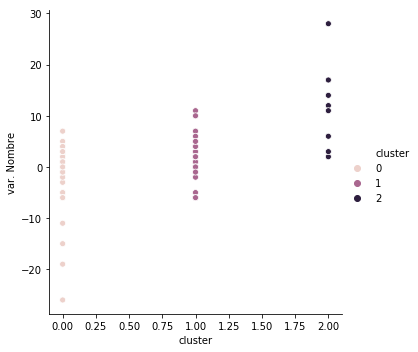

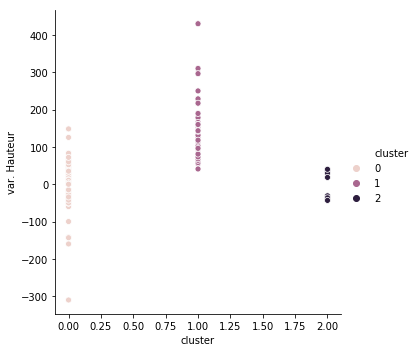

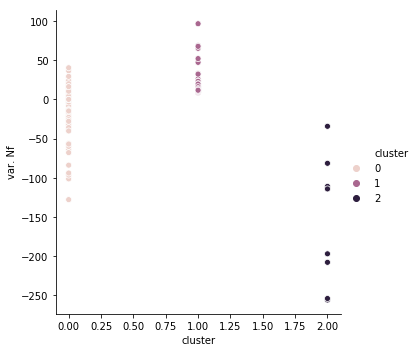

In [11]:

# Tracer des nuages de point représentant les différentes variations des EEE en fonction du cluster
#fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
g = sns.relplot(x='cluster', y='var. Nombre', hue='cluster', data=clust_prod, kind="scatter")

g1 = sns.relplot(x='cluster', y='var. Hauteur', hue='cluster', data=clust_prod, kind="scatter")

g = sns.relplot(x='cluster', y='var. Nf', hue='cluster', data=clust_prod, kind="scatter")
#plt.show()

#### Interprétation
-  classe 0 : correspond à une stabilisation de l'évolution car le nuage de point est centré en 0
- la classe 1 : Augmentation des EEE, la hauteur et le nb de feuilles son les plus importants
- la classe 2 : Diminution des EEE, Nf < 0 et hauteur stable.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# séparer les données en: entrées et sorties
X = clust_prod.iloc[:,4:10] #les caractéristiques
y = clust_prod.iloc[:,-1]  #les résulats (classes)

#print(X)

X_dum = pd.get_dummies(X)

#diviser les données en dataset d'apprentissage et dataset de test
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3,  random_state=42)

#Tree CART class
# créer un estimateur
estimator = DecisionTreeClassifier(criterion="entropy", max_depth = None, random_state=42)
# entrainer l'estimateur
estimator.fit(X_train, y_train)

#Tester l'estimateur
score = estimator.score(X_test, y_test)

print("le score de l'arbre de décision est :", score)

le score de l'arbre de décision est : 0.6052631578947368


In [32]:
#Prédiction pour NA1
X_NA1_S = [1,0,1,0,0,0]
X_NA1_S = np.array(X_NA1_S).reshape(1, -1)
y_pred1 = estimator.predict(X_NA1_S)
print("Avec le traitement NA1+Sol on a une évoultion correspondant au cluster", y_pred1, "(Stabilisation)")

#Prédiction pour NA1+Sol
X_NA1 = [1,0,0,0,0,0]
X_NA1 = np.array(X_NA1_S).reshape(1, -1)
y_pred1 = estimator.predict(X_NA1)
print("Avec le traitement NA1+Sol on a une évoultion correspondant au cluster", y_pred1, "(Stabilisation)")

#Prédiction pour NA2
X_NA2 = [0,1,0,0,0,0]
X_NA2 = np.array(X_NA2).reshape(1, -1)
y_pred1 = estimator.predict(X_NA2)
print("Avec le traitement NA2 on a une évoultion correspondant au cluster", y_pred1, "(Stabilisation)")


#Prédiction pour NA2+Sol
X_NA2S = [0,1,0,0,0,0]
X_NA2S = np.array(X_NA2S).reshape(1, -1)
y_pred1 = estimator.predict(X_NA2S)
print("Avec le traitement NA2+Sol on a une évoultion correspondant au cluster", y_pred1, "(Stabilisation)")

#Prédiction pour Invasive
X_Inv = [0,0,0,0,1,0]
X_Inv = np.array(X_Inv).reshape(1, -1)
y_pred1 = estimator.predict(X_Inv)
print("Avec le traitement Invasive on a une évoultion correspondant au cluster", y_pred1, "(Augmentation)")

Avec le traitement NA1+Sol on a une évoultion correspondant au cluster [0] (Stabilisation)
Avec le traitement NA1+Sol on a une évoultion correspondant au cluster [0] (Stabilisation)
Avec le traitement NA2 on a une évoultion correspondant au cluster [0] (Stabilisation)
Avec le traitement NA2+Sol on a une évoultion correspondant au cluster [0] (Stabilisation)
Avec le traitement Invasive on a une évoultion correspondant au cluster [1] (Augmentation)


In [18]:


export_graphviz(estimator,
   out_file="arbre_cart0.dot",
    feature_names = X_dum.columns,
    class_names=str(estimator.classes_))



#### Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\Durel\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
clust_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
Station          126 non-null object
Date initiale    126 non-null object
Date finale      126 non-null object
Réplicat         126 non-null object
NA1              126 non-null int64
NA2              126 non-null int64
Sol              126 non-null int64
Témoin           126 non-null int64
Invasive         126 non-null int64
Compost          126 non-null int64
var. Nombre      126 non-null float64
var. Hauteur     126 non-null float64
var. Nf          126 non-null float64
cluster          126 non-null int32
dtypes: float64(3), int32(1), int64(6), object(4)
memory usage: 13.4+ KB


In [36]:

x_train, x_test, y_train, y_test  = train_test_split(X, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None)

In [39]:
modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

importance
NA2         0.230849
Invasive    0.218197
Compost     0.171200
NA1         0.141464
Sol         0.128001
Témoin      0.110288

In [41]:
score = modele_rf.score(X_test, y_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'